In [1]:
#Import dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.image as mpimg
import sklearn as skl
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [3]:
# Import our input dataset
wine_df = pd.read_csv('winemag-data_first150k.csv',index_col= 'Unnamed: 0')

In [4]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [5]:
#Fill NA/NaN values on the column region_2 with value 'None'.
wine_df['region_2'] = wine_df['region_2'].fillna('None')

In [6]:
#Count the region_1 values we have in our dataframe.
region_counts = wine_df.region_1.value_counts()
region_counts

Napa Valley                  6209
Columbia Valley (WA)         4975
Mendoza                      3586
Russian River Valley         3571
California                   3462
                             ... 
Alpilles                        1
Vin de Pays de Hauterive        1
Santa Barbara-Monterey          1
Sonoma County-Lake County       1
Coteaux du Tricastin            1
Name: region_1, Length: 1236, dtype: int64

<AxesSubplot:ylabel='Density'>

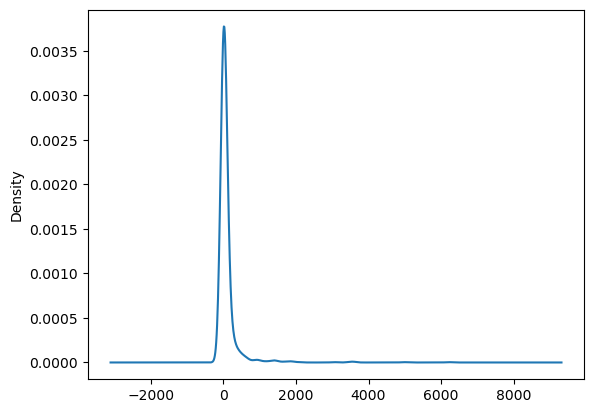

In [7]:
#Visualizing the region counts,
region_counts.plot.density()

In [8]:
#Stats for the region_1
region_counts.describe()

count    1236.00000
mean      101.83657
std       364.95702
min         1.00000
25%         4.00000
50%        12.50000
75%        58.00000
max      6209.00000
Name: region_1, dtype: float64

In [9]:
#List all the region_1 under a frequency of 500 to group them into a new category named "Other".

replace_region = list(region_counts[region_counts < 500].index)
replace_region

['Monterey County',
 'Alto Adige',
 'South Eastern Australia',
 'Barossa Valley',
 'Margaux',
 'Amador County',
 'Rías Baixas',
 'Mendocino',
 'Mendocino County',
 'Dundee Hills',
 'Colli Orientali del Friuli',
 'South Australia',
 'Oakville',
 'Oregon',
 'Sierra Foothills',
 'Franciacorta',
 'Haut-Médoc',
 'Conegliano Valdobbiadene Prosecco Superiore',
 'Virginia',
 'Livermore Valley',
 'Bordeaux Blanc',
 'Wahluke Slope',
 'Navarra',
 'Lake County',
 'Rueda',
 'Bolgheri',
 "Barbera d'Alba",
 'Pauillac',
 'Bordeaux',
 'Barossa',
 'North Coast',
 'Médoc',
 'Priorat',
 'Vino de la Tierra de Castilla',
 'Pomerol',
 "Vin de Pays d'Oc",
 'Uco Valley',
 'Valpolicella Superiore Ripasso',
 'Toro',
 'Bourgogne',
 'Sauternes',
 'Arroyo Seco',
 'Luján de Cuyo',
 'Rogue Valley',
 "Barbera d'Asti",
 'Howell Mountain',
 'Meursault',
 'Valpolicella Classico Superiore Ripasso',
 'Clare Valley',
 'Chehalem Mountains',
 'Rosso di Montalcino',
 'El Dorado',
 "Montepulciano d'Abruzzo",
 'Saint-Estèphe',
 

In [10]:
for i in replace_region:
    wine_df.region_1 = wine_df.region_1.replace(i,"Other")

region_counts = wine_df.region_1.value_counts()


<AxesSubplot:ylabel='Density'>

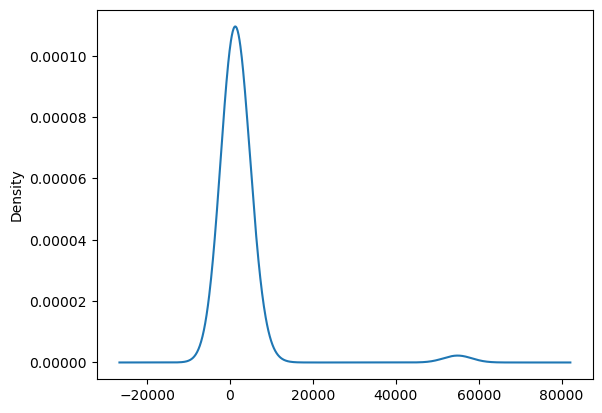

In [11]:
#Plot region data after grouping in category "Other".
region_counts.plot.density()

In [12]:
#Counting the values we have in the "Winery column".
winery_counts=wine_df.winery.value_counts()
winery_counts

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
                        ... 
Republic of Wine           1
Prince Michel              1
Glass House                1
Jones von Drehle           1
White Knot                 1
Name: winery, Length: 14810, dtype: int64

<AxesSubplot:ylabel='Density'>

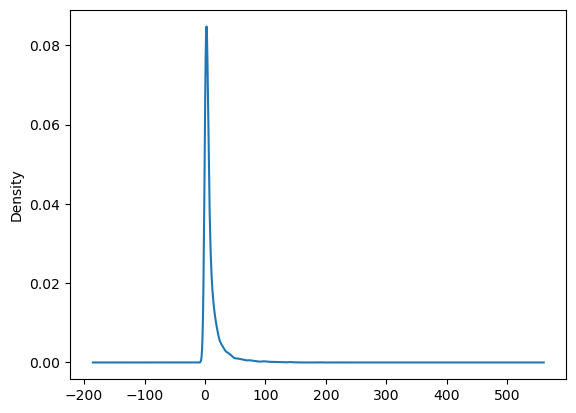

In [13]:
#Plot winery data.
winery_counts.plot.density()

In [14]:
#Stats for winery column.
winery_counts.describe()

count    14810.000000
mean        10.191087
std         17.359978
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max        374.000000
Name: winery, dtype: float64

In [15]:
#List all the wineries with a frequency of 30 or less to group them into a new category named "Other".
replace_winery = list(winery_counts[winery_counts < 30].index)
replace_winery

['Claiborne & Churchill',
 'BOND',
 'Hawley',
 'Winderlea',
 'Merriam',
 'William Cole',
 'Argiano',
 'Peters Family',
 'Allegrini',
 'San Rustico',
 'Drappier',
 "Masies d'Avinyo",
 'Francis Coppola',
 'Máté',
 'Belle Glos',
 'Ruca Malen',
 'Davis Bynum',
 'Fiuza',
 'Belhurst',
 'Lincourt',
 'Clos Troteligotte',
 'Souverain',
 'Lone Canary',
 'Shingleback',
 'Ruggeri & C.',
 'Villa Mt. Eden',
 'Rivetto',
 'Tapestry',
 'West Cape Howe',
 'Sextant',
 'St. Clement',
 'Domaine Pouillon',
 'Qupé',
 'Gordon Brothers',
 'Warwick',
 'Casa do Valle',
 'Escarpment',
 'Kana',
 'Poggio Nardone',
 'Adega Cooperativa do Cartaxo',
 'Seven of Hearts',
 'Nobilo',
 'Gritsch Mauritiushof',
 'Sella & Mosca',
 'Cloudy Bay',
 'Desert Wind',
 'Cowhorn',
 'Christian Lazo',
 'Bergevin Lane',
 'Castello di Poppiano',
 'Rieflé',
 'Oak Knoll',
 'Corley',
 'Stephen & Walker',
 'Setzer',
 "Osprey's Dominion",
 'Alvaro Castro',
 'Condado de Oriza',
 'Valdo',
 'Bota Box',
 'Château Malartic-Lagravière',
 "Quinta de 

In [16]:
for i in replace_winery:
    wine_df.winery = wine_df.winery.replace(i,"Other")

winery_counts = wine_df.winery.value_counts()

In [17]:
#Counting the values we have in the "Winery column" after regrouping.
winery_counts

Other                         84915
Williams Selyem                 374
Testarossa                      274
DFJ Vinhos                      258
Chateau Ste. Michelle           225
                              ...  
Parkers Estate                   30
Borra                            30
Hobo                             30
Château Smith Haut Lafitte       30
Palivou                          30
Name: winery, Length: 1172, dtype: int64

In [18]:
#Removing missing values in the dataframe.
wine_df.dropna(inplace=True)
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Other
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Other,None,Tinta de Toro,Other
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Other,Sonoma,Sauvignon Blanc,Other
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Other,None,Provence red blend,Other
...,...,...,...,...,...,...,...,...,...,...
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,None,Champagne Blend,Other
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,None,Champagne Blend,Other
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,None,Champagne Blend,Other
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Other,None,White Blend,Terredora


In [19]:
# Extract the description column as a list
description = wine_df['description'].tolist()
description

['This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.',
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.',
 'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.',
 "This spent 20 months in 30% ne

In [20]:
#Here continue Deep neural model.
#Dropping columns "Description" and "Designation" from the DataFRame.
wine_df = wine_df.drop(columns=['description','designation'])

In [21]:
#How many rows does our DF have?
wine_df.tail()

,country,points,price,province,region_1,region_2,variety,winery
150923,France,91,30.0,Champagne,Champagne,None,Champagne Blend,Other
150924,France,91,70.0,Champagne,Champagne,None,Champagne Blend,Other
150926,France,91,27.0,Champagne,Champagne,None,Champagne Blend,Other
150927,Italy,91,20.0,Southern Italy,Other,None,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne,None,Champagne Blend,Other


In [22]:
for col in wine_df:
    print(wine_df[col].dtype)

object
int64
float64
object
object
object
object
object


In [23]:
# Encodes categorical features as one-hot numeric dense array.
enc = OneHotEncoder(sparse= False)

In [24]:
for col in wine_df:
    if wine_df[col].dtype == 'object':
        enc_col = wine_df[col]
        wine_df = wine_df.drop(columns=col)
        enc_col2 = pd.DataFrame(enc.fit_transform(enc_col.values.reshape(-1,1)))
        enc_col2.columns = enc.get_feature_names([col])
        wine_df = wine_df.merge(enc_col2,left_index=True,right_index=True)
        
        

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function

In [25]:
wine_df.head()

,points,price,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,...,winery_William Church,winery_William Hill Estate,winery_Williams Selyem,winery_Wilson,winery_Woodward Canyon,winery_Wölffer,winery_Yalumba,winery_Zaca Mesa,winery_Zenato,winery_Zuccardi
0,96,235.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95,66.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Tokenizing the words from 'description'column.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [27]:
# Set tokenizer parameters and fit on the text data
oov_tok = '<OOV>'
embedding_dim = 20
vocab_size = 40000
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(description)

In [28]:
# Convert the text data to sequences and pad them
max_length = 140  # or any other maximum sequence length you prefer
trunc_type = 'post'  # or 'pre', depending on how you want to truncate sequences
sequences = tokenizer.texts_to_sequences(description)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [29]:
# Create a new DataFrame with the padded sequences to merge with the other dataframes.
cols = ['seq_' + str(i) for i in range(max_length)]
padded_df = pd.DataFrame(padded, columns=cols)

In [30]:
#Merging the padded_df with the original.
wine_df = wine_df.merge(padded_df, left_index=True, right_index=True)

In [31]:
wine_df

,points,price,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,...,seq_130,seq_131,seq_132,seq_133,seq_134,seq_135,seq_136,seq_137,seq_138,seq_139
0,96,235.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,59,1790,5,13,12,339,906,1209,559,20282
1,96,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,12806,19,7,1258,15,9349,102,33,76,3294
2,96,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,2576,5,41,20286,3420,2635,5,667,340
3,96,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,574,6,67,58,2,387,33,40,76,10220
4,95,66.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,13,7,4,9,99,22,201,33,23,861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,89,45.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,180,31,73,2,150,11,4982,10,818,186
3514,89,35.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,41,31,28,20,259,2,67,58,11,304
3515,89,32.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,342,106,349,2754,24,741,3,163,288,1709
3518,89,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2,13037,3,26,71,4,632,42,73,134


In [32]:
for col in wine_df:
    print(col)

points
price
country_Argentina
country_Australia
country_Canada
country_France
country_Italy
country_Spain
country_US
province_Alsace
province_Andalucia
province_Arizona
province_Australia Other
province_Beaujolais
province_Bordeaux
province_British Columbia
province_Burgundy
province_California
province_Catalonia
province_Central Italy
province_Central Spain
province_Champagne
province_Colorado
province_France Other
province_Galicia
province_Idaho
province_Iowa
province_Italy Other
province_Languedoc-Roussillon
province_Levante
province_Loire Valley
province_Lombardy
province_Massachusetts
province_Mendoza Province
province_Michigan
province_Missouri
province_New Jersey
province_New Mexico
province_New South Wales
province_New York
province_North Carolina
province_Northeastern Italy
province_Northern Spain
province_Northwestern Italy
province_Ohio
province_Ontario
province_Oregon
province_Other
province_Pennsylvania
province_Piedmont
province_Provence
province_Rhône Valley
province_Si

In [33]:
#Define our target and feature variables.
y = wine_df['points']
X = wine_df.drop(columns='points')

In [34]:
## Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
## Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

In [36]:
print(len(X_train_scaled[0]))

942


In [37]:
X

,price,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,province_Andalucia,...,seq_130,seq_131,seq_132,seq_133,seq_134,seq_135,seq_136,seq_137,seq_138,seq_139
0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,59,1790,5,13,12,339,906,1209,559,20282
1,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12806,19,7,1258,15,9349,102,33,76,3294
2,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,2576,5,41,20286,3420,2635,5,667,340
3,65.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,574,6,67,58,2,387,33,40,76,10220
4,66.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13,7,4,9,99,22,201,33,23,861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,45.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,180,31,73,2,150,11,4982,10,818,186
3514,35.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,41,31,28,20,259,2,67,58,11,304
3515,32.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,342,106,349,2754,24,741,3,163,288,1709
3518,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2,13037,3,26,71,4,632,42,73,134


In [38]:
#Defining the model
number_input_features = len(X_train_scaled[0])
hidden_layers_1 = 750
hidden_layers_list = [250]

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hidden_layers_1, input_dim=number_input_features, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
nn.add(tf.keras.layers.Dropout(0.5))
for i in hidden_layers_list:
    nn.add(tf.keras.layers.Dense(units=i, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
    nn.add(tf.keras.layers.Dropout(0.5))

nn.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [39]:
#Create a callback that saves the model's weights
checkpoint = ModelCheckpoint('best_weights.h5',save_best_only=True,save_weights_only = True,monitor = 'val_mae',verbose = 1)

In [40]:
# Compile the model
nn.compile(loss = 'mae',optimizer ='adam',metrics=['mae'])

In [41]:
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 750)               707250    
                                                                 
 dropout (Dropout)           (None, 750)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               187750    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 895,251
Trainable params: 895,251
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Preventing the overfitting.
early_stop = EarlyStopping(monitor='val_mae',patience = 5, verbose = 1)

In [43]:
start_time = time.time()
history = []
for i in range(1,101):
    if i == 75:
        early_stop = EarlyStopping(monitor='val_mae',patience = 3, verbose = 1)
    elif i == 80:
        early_stop = EarlyStopping(monitor='val_mae',patience = 1, verbose = 1)
    nn.fit(X_train_scaled,y_train,epochs=10000,validation_data=(X_test,y_test),callbacks=[checkpoint,early_stop])
    if i % 2 != 0:
        print(f"loaded Weights {i}")
        nn.load_weights('best_weights.h5')
    else:
        print(f"Random Weights {i}")
    history.append(nn.history.history)

end_time = time.time()

Epoch 1/10000
48/51 [===========================>..] - ETA: 0s - loss: 226.7808 - mae: 65.3570
Epoch 1: val_mae improved from inf to 32467.12109, saving model to best_weights.h5
51/51 [==============================] - 2s 22ms/step - loss: 221.7805 - mae: 63.8501 - val_loss: 32550.0859 - val_mae: 32467.1211
Epoch 2/10000
50/51 [============================>.] - ETA: 0s - loss: 78.7092 - mae: 14.2664
Epoch 2: val_mae improved from 32467.12109 to 19698.31836, saving model to best_weights.h5
51/51 [==============================] - 1s 19ms/step - loss: 78.6336 - mae: 14.2518 - val_loss: 19751.6543 - val_mae: 19698.3184
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 62.7863 - mae: 13.6952
Epoch 3: val_mae improved from 19698.31836 to 18841.04688, saving model to best_weights.h5
51/51 [==============================] - 1s 17ms/step - loss: 62.7023 - mae: 13.6990 - val_loss: 18886.6328 - val_mae: 18841.0469
Epoch 4/10000
49/51 [===========================>..] - ETA: 0

49/51 [===========================>..] - ETA: 0s - loss: 21.3460 - mae: 7.7262
Epoch 28: val_mae improved from 1747.95483 to 1647.83411, saving model to best_weights.h5
51/51 [==============================] - 1s 16ms/step - loss: 21.3023 - mae: 7.6965 - val_loss: 1660.9336 - val_mae: 1647.8341
Epoch 29/10000
48/51 [===========================>..] - ETA: 0s - loss: 20.3132 - mae: 7.5320
Epoch 29: val_mae did not improve from 1647.83411
51/51 [==============================] - 1s 15ms/step - loss: 20.3883 - mae: 7.6050 - val_loss: 2118.1707 - val_mae: 2105.0356
Epoch 30/10000
49/51 [===========================>..] - ETA: 0s - loss: 20.2352 - mae: 7.5439
Epoch 30: val_mae improved from 1647.83411 to 1580.72583, saving model to best_weights.h5
51/51 [==============================] - 1s 16ms/step - loss: 20.2261 - mae: 7.5356 - val_loss: 1593.3331 - val_mae: 1580.7258
Epoch 31/10000
48/51 [===========================>..] - ETA: 0s - loss: 20.3552 - mae: 7.5940
Epoch 31: val_mae did not im

51/51 [==============================] - 1s 19ms/step - loss: 13.7032 - mae: 6.5128 - val_loss: 303.6455 - val_mae: 296.4938
Epoch 4/10000
51/51 [==============================] - ETA: 0s - loss: 13.8719 - mae: 6.6918
Epoch 4: val_mae did not improve from 296.49380
51/51 [==============================] - 1s 16ms/step - loss: 13.8719 - mae: 6.6918 - val_loss: 431.1872 - val_mae: 424.0803
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 13.9869 - mae: 6.9832
Epoch 5: val_mae did not improve from 296.49380
51/51 [==============================] - 1s 15ms/step - loss: 13.9967 - mae: 6.9895 - val_loss: 358.4313 - val_mae: 351.2828
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 13.9570 - mae: 6.7845
Epoch 6: val_mae did not improve from 296.49380
51/51 [==============================] - 1s 16ms/step - loss: 13.9621 - mae: 6.7950 - val_loss: 534.3317 - val_mae: 527.4426
Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 13.672

51/51 [==============================] - 1s 17ms/step - loss: 11.2147 - mae: 6.1669 - val_loss: 342.9576 - val_mae: 337.9539
Epoch 6/10000
48/51 [===========================>..] - ETA: 0s - loss: 11.4145 - mae: 6.3499
Epoch 6: val_mae did not improve from 168.09544
51/51 [==============================] - 1s 22ms/step - loss: 11.3694 - mae: 6.3043 - val_loss: 199.4217 - val_mae: 194.4346
Epoch 7/10000
51/51 [==============================] - ETA: 0s - loss: 11.2201 - mae: 6.1749
Epoch 7: val_mae did not improve from 168.09544
51/51 [==============================] - 1s 20ms/step - loss: 11.2201 - mae: 6.1749 - val_loss: 403.4397 - val_mae: 398.6784
Epoch 7: early stopping
Random Weights 4
Epoch 1/10000
48/51 [===========================>..] - ETA: 0s - loss: 11.0216 - mae: 6.2456
Epoch 1: val_mae did not improve from 168.09544
51/51 [==============================] - 1s 17ms/step - loss: 11.0493 - mae: 6.2803 - val_loss: 300.3143 - val_mae: 295.7007
Epoch 2/10000
48/51 [===============

51/51 [==============================] - 1s 18ms/step - loss: 9.7214 - mae: 6.3962 - val_loss: 50.6979 - val_mae: 47.2058
Epoch 7/10000
50/51 [============================>.] - ETA: 0s - loss: 9.5373 - mae: 6.1375
Epoch 7: val_mae did not improve from 47.20580
51/51 [==============================] - 1s 17ms/step - loss: 9.5329 - mae: 6.1339 - val_loss: 138.3554 - val_mae: 135.1195
Epoch 8/10000
49/51 [===========================>..] - ETA: 0s - loss: 9.2796 - mae: 6.0784
Epoch 8: val_mae did not improve from 47.20580
51/51 [==============================] - 1s 15ms/step - loss: 9.2830 - mae: 6.0830 - val_loss: 99.9760 - val_mae: 96.7779
Epoch 9/10000
49/51 [===========================>..] - ETA: 0s - loss: 9.3442 - mae: 6.2081
Epoch 9: val_mae did not improve from 47.20580
51/51 [==============================] - 1s 15ms/step - loss: 9.3394 - mae: 6.2096 - val_loss: 112.0307 - val_mae: 109.0859
Epoch 10/10000
50/51 [============================>.] - ETA: 0s - loss: 8.9096 - mae: 6.073

51/51 [==============================] - 1s 15ms/step - loss: 7.9731 - mae: 6.1154 - val_loss: 38.8869 - val_mae: 36.9535
Epoch 26/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.8703 - mae: 5.9633
Epoch 26: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 15ms/step - loss: 7.8244 - mae: 5.9255 - val_loss: 46.4804 - val_mae: 44.8365
Epoch 27/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4389 - mae: 5.7503
Epoch 27: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 15ms/step - loss: 7.4269 - mae: 5.7388 - val_loss: 27.2935 - val_mae: 25.5739
Epoch 27: early stopping
loaded Weights 7
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.8354 - mae: 5.8813
Epoch 1: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 16ms/step - loss: 7.8159 - mae: 5.8666 - val_loss: 47.7140 - val_mae: 45.9354
Epoch 2/10000
49/51 [===========================>

51/51 [==============================] - 1s 15ms/step - loss: 8.5677 - mae: 6.0416 - val_loss: 59.4633 - val_mae: 57.1713
Epoch 8/10000
49/51 [===========================>..] - ETA: 0s - loss: 8.1948 - mae: 6.0252
Epoch 8: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 14ms/step - loss: 8.2103 - mae: 6.0435 - val_loss: 102.2809 - val_mae: 100.2124
Epoch 8: early stopping
Random Weights 10
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.9011 - mae: 5.8318
Epoch 1: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 16ms/step - loss: 7.8713 - mae: 5.8014 - val_loss: 71.4343 - val_mae: 69.3658
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.8392 - mae: 5.9387
Epoch 2: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 15ms/step - loss: 7.8400 - mae: 5.9428 - val_loss: 39.6886 - val_mae: 37.9357
Epoch 3/10000
49/51 [===========================>..

51/51 [==============================] - 1s 16ms/step - loss: 7.2045 - mae: 5.8361 - val_loss: 102.1280 - val_mae: 100.6209
Epoch 9: early stopping
loaded Weights 13
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 9.7087 - mae: 5.9580
Epoch 1: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 17ms/step - loss: 9.7150 - mae: 5.9632 - val_loss: 141.3946 - val_mae: 137.6407
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 9.7236 - mae: 6.1057
Epoch 2: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 15ms/step - loss: 9.7149 - mae: 6.1079 - val_loss: 79.1948 - val_mae: 76.0419
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 9.1514 - mae: 6.0842
Epoch 3: val_mae did not improve from 13.78753
51/51 [==============================] - 1s 15ms/step - loss: 9.1633 - mae: 6.0981 - val_loss: 50.5409 - val_mae: 47.4876
Epoch 4/10000
49/51 [===========================>

49/51 [===========================>..] - ETA: 0s - loss: 7.2049 - mae: 5.8935
Epoch 15: val_mae did not improve from 10.58001
51/51 [==============================] - 1s 16ms/step - loss: 7.2188 - mae: 5.9066 - val_loss: 42.2029 - val_mae: 40.8420
Epoch 16/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3481 - mae: 5.9990
Epoch 16: val_mae did not improve from 10.58001
51/51 [==============================] - 1s 15ms/step - loss: 7.3466 - mae: 5.9990 - val_loss: 45.6473 - val_mae: 44.3788
Epoch 16: early stopping
loaded Weights 15
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3468 - mae: 5.9892
Epoch 1: val_mae did not improve from 10.58001
51/51 [==============================] - 1s 16ms/step - loss: 7.3397 - mae: 5.9853 - val_loss: 27.4600 - val_mae: 26.1416
Epoch 2/10000
51/51 [==============================] - ETA: 0s - loss: 7.1928 - mae: 5.8735
Epoch 2: val_mae did not improve from 10.58001
51/51 [==============================] - 1s 15

Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3746 - mae: 6.0062
Epoch 7: val_mae did not improve from 10.58001
51/51 [==============================] - 1s 15ms/step - loss: 7.3961 - mae: 6.0247 - val_loss: 29.3835 - val_mae: 27.8133
Epoch 8/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4762 - mae: 6.0123
Epoch 8: val_mae did not improve from 10.58001
51/51 [==============================] - 1s 15ms/step - loss: 7.4686 - mae: 6.0068 - val_loss: 38.7769 - val_mae: 37.3662
Epoch 9/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2004 - mae: 5.8537
Epoch 9: val_mae improved from 10.58001 to 9.44920, saving model to best_weights.h5
51/51 [==============================] - 1s 16ms/step - loss: 7.1728 - mae: 5.8277 - val_loss: 10.7156 - val_mae: 9.4492
Epoch 10/10000
51/51 [==============================] - ETA: 0s - loss: 7.2679 - mae: 5.9925
Epoch 10: val_mae did not improve from 9.44920
51/51 [==============================] - 

Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.7022 - mae: 6.0874
Epoch 5: val_mae did not improve from 8.60178
51/51 [==============================] - 1s 15ms/step - loss: 7.7048 - mae: 6.0913 - val_loss: 44.0744 - val_mae: 42.5144
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2143 - mae: 5.7082
Epoch 6: val_mae did not improve from 8.60178
51/51 [==============================] - 1s 15ms/step - loss: 7.2557 - mae: 5.7512 - val_loss: 31.1729 - val_mae: 29.7180
Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.5636 - mae: 6.1155
Epoch 7: val_mae did not improve from 8.60178
51/51 [==============================] - 1s 15ms/step - loss: 7.5312 - mae: 6.0841 - val_loss: 51.0558 - val_mae: 49.6764
Epoch 8/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.3047 - mae: 5.8881
Epoch 8: val_mae did not improve from 8.60178
51/51 [==============================] - 1s 15ms/step - loss: 7.2961 - mae: 5.8807

Epoch 2/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.4259 - mae: 6.0689
Epoch 2: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.4222 - mae: 6.0693 - val_loss: 8.8859 - val_mae: 7.5394
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.0262 - mae: 5.7291
Epoch 3: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 16ms/step - loss: 7.0331 - mae: 5.7372 - val_loss: 8.9072 - val_mae: 7.5884
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2003 - mae: 5.8942
Epoch 4: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.1955 - mae: 5.8883 - val_loss: 27.3055 - val_mae: 26.0208
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.9400 - mae: 5.6271
Epoch 5: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 6.9708 - mae: 5.6553 - v

Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1063 - mae: 5.9135
Epoch 2: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.1156 - mae: 5.9238 - val_loss: 29.9880 - val_mae: 28.8613
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.9433 - mae: 5.7364
Epoch 3: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 6.9185 - mae: 5.7123 - val_loss: 58.4639 - val_mae: 57.2778
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1190 - mae: 5.8673
Epoch 4: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.1349 - mae: 5.8813 - val_loss: 39.2032 - val_mae: 37.8613
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2477 - mae: 5.8665
Epoch 5: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.2359 - mae: 5.8555

Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3940 - mae: 6.0208
Epoch 3: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.3890 - mae: 6.0159 - val_loss: 37.2105 - val_mae: 35.8786
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2903 - mae: 5.9855
Epoch 4: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.2952 - mae: 5.9917 - val_loss: 26.5707 - val_mae: 25.3375
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3103 - mae: 6.0408
Epoch 5: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.3204 - mae: 6.0514 - val_loss: 22.5428 - val_mae: 21.3260
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1406 - mae: 5.9522
Epoch 6: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.1333 - mae: 5.9454

51/51 [==============================] - ETA: 0s - loss: 7.1858 - mae: 6.0028
Epoch 13: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 16ms/step - loss: 7.1858 - mae: 6.0028 - val_loss: 18.3492 - val_mae: 17.1864
Epoch 14/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.8649 - mae: 5.7423
Epoch 14: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 16ms/step - loss: 6.8792 - mae: 5.7575 - val_loss: 49.7864 - val_mae: 48.6971
Epoch 15/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.9224 - mae: 5.8396
Epoch 15: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 6.9327 - mae: 5.8500 - val_loss: 46.4725 - val_mae: 45.4091
Epoch 16/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.0964 - mae: 6.0148
Epoch 16: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.0939 - mae: 6.0121 - val_

49/51 [===========================>..] - ETA: 0s - loss: 7.5639 - mae: 5.9611
Epoch 20: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.5835 - mae: 5.9830 - val_loss: 78.9348 - val_mae: 77.4168
Epoch 21/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.4023 - mae: 5.8692
Epoch 21: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.4244 - mae: 5.8936 - val_loss: 100.4453 - val_mae: 98.9299
Epoch 21: early stopping
loaded Weights 35
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3419 - mae: 5.8929
Epoch 1: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.3720 - mae: 5.9252 - val_loss: 78.3950 - val_mae: 76.9560
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4405 - mae: 5.7944
Epoch 2: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/

Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2909 - mae: 5.8278
Epoch 6: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.2652 - mae: 5.8040 - val_loss: 119.9461 - val_mae: 118.5855
Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1192 - mae: 5.7579
Epoch 7: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 15ms/step - loss: 7.1180 - mae: 5.7558 - val_loss: 57.9133 - val_mae: 56.5368
Epoch 7: early stopping
Random Weights 38
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3558 - mae: 6.0000
Epoch 1: val_mae did not improve from 6.27421
51/51 [==============================] - 1s 16ms/step - loss: 7.3267 - mae: 5.9739 - val_loss: 27.3772 - val_mae: 26.1231
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.9613 - mae: 5.7562
Epoch 2: val_mae did not improve from 6.27421
51/51 [==============================]

51/51 [==============================] - 1s 16ms/step - loss: 7.4015 - mae: 5.8212 - val_loss: 171.6150 - val_mae: 170.1254
Epoch 2/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.5476 - mae: 6.0344
Epoch 2: val_mae did not improve from 4.14576
51/51 [==============================] - 1s 15ms/step - loss: 7.5247 - mae: 6.0192 - val_loss: 110.6911 - val_mae: 109.2981
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1024 - mae: 5.8257
Epoch 3: val_mae did not improve from 4.14576
51/51 [==============================] - 1s 15ms/step - loss: 7.1005 - mae: 5.8253 - val_loss: 51.4312 - val_mae: 50.2222
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.0174 - mae: 5.8127
Epoch 4: val_mae did not improve from 4.14576
51/51 [==============================] - 1s 15ms/step - loss: 6.9911 - mae: 5.7861 - val_loss: 171.1626 - val_mae: 169.9633
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4005 - mae: 6.2053


51/51 [==============================] - 1s 15ms/step - loss: 7.7387 - mae: 5.9114 - val_loss: 16.9044 - val_mae: 15.1834
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3089 - mae: 5.7199
Epoch 4: val_mae did not improve from 4.14576
51/51 [==============================] - 1s 15ms/step - loss: 7.3034 - mae: 5.7156 - val_loss: 60.2838 - val_mae: 58.7141
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.6682 - mae: 5.9683
Epoch 5: val_mae did not improve from 4.14576
51/51 [==============================] - 1s 15ms/step - loss: 7.6741 - mae: 5.9683 - val_loss: 88.6698 - val_mae: 86.7138
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.8539 - mae: 5.7503
Epoch 6: val_mae did not improve from 4.14576
51/51 [==============================] - 1s 15ms/step - loss: 7.8963 - mae: 5.7919 - val_loss: 364.7639 - val_mae: 362.6528
Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.8622 - mae: 5.8943
Epoc

49/51 [===========================>..] - ETA: 0s - loss: 7.2957 - mae: 5.8765
Epoch 4: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.3153 - mae: 5.8990 - val_loss: 20.1961 - val_mae: 18.8604
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1454 - mae: 5.8730
Epoch 5: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.1759 - mae: 5.9046 - val_loss: 29.4590 - val_mae: 28.2227
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2019 - mae: 5.9796
Epoch 6: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.1922 - mae: 5.9715 - val_loss: 24.9232 - val_mae: 23.7866
Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.0079 - mae: 5.8476
Epoch 7: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.0100 - mae: 5.8485 - val_loss: 3

Random Weights 54
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4957 - mae: 5.9701
Epoch 1: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 16ms/step - loss: 7.4710 - mae: 5.9458 - val_loss: 41.5707 - val_mae: 40.0664
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3919 - mae: 5.9278
Epoch 2: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.4023 - mae: 5.9393 - val_loss: 70.1636 - val_mae: 68.7449
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2966 - mae: 5.8565
Epoch 3: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.2907 - mae: 5.8530 - val_loss: 54.7983 - val_mae: 53.4318
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2252 - mae: 5.9031
Epoch 4: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.

Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1337 - mae: 6.0032
Epoch 6: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.0962 - mae: 5.9651 - val_loss: 16.3456 - val_mae: 15.1800
Epoch 7/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.1163 - mae: 5.9738
Epoch 7: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 16ms/step - loss: 7.0917 - mae: 5.9530 - val_loss: 26.8116 - val_mae: 25.6836
Epoch 8/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.9807 - mae: 5.8539
Epoch 8: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 6.9811 - mae: 5.8542 - val_loss: 48.4429 - val_mae: 47.3097
Epoch 8: early stopping
loaded Weights 59
Epoch 1/10000
51/51 [==============================] - ETA: 0s - loss: 7.3001 - mae: 5.9904
Epoch 1: val_mae did not improve from 4.03041
51/51 [==============================] -

Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3162 - mae: 5.9101
Epoch 4: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.3393 - mae: 5.9298 - val_loss: 36.7032 - val_mae: 35.1394
Epoch 5/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4659 - mae: 5.9870
Epoch 5: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.4576 - mae: 5.9792 - val_loss: 37.9045 - val_mae: 36.3637
Epoch 6/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3075 - mae: 5.8278
Epoch 6: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 14ms/step - loss: 7.3122 - mae: 5.8335 - val_loss: 22.1956 - val_mae: 20.7590
Epoch 6: early stopping
Random Weights 64
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2881 - mae: 5.8585
Epoch 1: val_mae did not improve from 4.03041
51/51 [==============================] -

Epoch 16/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1046 - mae: 5.9470
Epoch 16: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.0984 - mae: 5.9407 - val_loss: 23.7979 - val_mae: 22.6454
Epoch 17/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.1674 - mae: 6.0089
Epoch 17: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.1470 - mae: 5.9910 - val_loss: 9.9858 - val_mae: 8.8781
Epoch 18/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.8772 - mae: 5.7092
Epoch 18: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 6.9155 - mae: 5.7444 - val_loss: 12.3623 - val_mae: 11.0763
Epoch 19/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2470 - mae: 5.7829
Epoch 19: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.2402 - mae: 

Epoch 7/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1729 - mae: 5.7883
Epoch 7: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.1695 - mae: 5.7858 - val_loss: 129.9721 - val_mae: 128.5448
Epoch 7: early stopping
loaded Weights 71
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2246 - mae: 5.8582
Epoch 1: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 16ms/step - loss: 7.2061 - mae: 5.8418 - val_loss: 12.3483 - val_mae: 11.0360
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3494 - mae: 5.9386
Epoch 2: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.3633 - mae: 5.9517 - val_loss: 21.4340 - val_mae: 20.0021
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4339 - mae: 5.9312
Epoch 3: val_mae did not improve from 4.03041
51/51 [==============================]

Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4412 - mae: 5.8969
Epoch 2: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.5022 - mae: 5.9563 - val_loss: 72.0668 - val_mae: 70.4790
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.4898 - mae: 5.9494
Epoch 3: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.5042 - mae: 5.9675 - val_loss: 138.7997 - val_mae: 137.3558
Epoch 4/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.2250 - mae: 5.9143
Epoch 4: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 14ms/step - loss: 7.2358 - mae: 5.9264 - val_loss: 131.5464 - val_mae: 130.2334
Epoch 4: early stopping
loaded Weights 75
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.3667 - mae: 5.9407
Epoch 1: val_mae did not improve from 4.03041
51/51 [=============================

51/51 [==============================] - 1s 14ms/step - loss: 7.1758 - mae: 5.9521 - val_loss: 17.4452 - val_mae: 16.2072
Epoch 3: early stopping
Random Weights 82
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1378 - mae: 5.9234
Epoch 1: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 16ms/step - loss: 7.1357 - mae: 5.9212 - val_loss: 31.5574 - val_mae: 30.3121
Epoch 2/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.5466 - mae: 6.2342
Epoch 2: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.5448 - mae: 6.2337 - val_loss: 12.0130 - val_mae: 10.7203
Epoch 3/10000
49/51 [===========================>..] - ETA: 0s - loss: 7.1946 - mae: 5.9446
Epoch 3: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 14ms/step - loss: 7.1901 - mae: 5.9415 - val_loss: 28.7777 - val_mae: 27.6320
Epoch 3: early stopping
loaded Weights 83
Epoch 1/10000


49/51 [===========================>..] - ETA: 0s - loss: 7.1100 - mae: 5.8125
Epoch 4: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 15ms/step - loss: 7.1209 - mae: 5.8238 - val_loss: 29.1870 - val_mae: 27.9967
Epoch 4: early stopping
loaded Weights 93
Epoch 1/10000
51/51 [==============================] - ETA: 0s - loss: 7.2239 - mae: 5.8873
Epoch 1: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 17ms/step - loss: 7.2239 - mae: 5.8873 - val_loss: 9.6485 - val_mae: 8.3429
Epoch 2/10000
48/51 [===========================>..] - ETA: 0s - loss: 7.0020 - mae: 5.7470
Epoch 2: val_mae did not improve from 4.03041
51/51 [==============================] - 1s 21ms/step - loss: 6.9491 - mae: 5.6952 - val_loss: 32.0235 - val_mae: 30.8031
Epoch 2: early stopping
Random Weights 94
Epoch 1/10000
49/51 [===========================>..] - ETA: 0s - loss: 6.9309 - mae: 5.7186
Epoch 1: val_mae did not improve from 4.03041
51/51 [=======

In [44]:
#Evaluate the model
loss,accuracy = nn.evaluate(X_test,y_test)

13/13 [==============================] - 0s 4ms/step - loss: 57.6308 - mae: 55.7811


In [45]:
total_time = end_time - start_time

print(f'{total_time} seconds')

681.0573651790619 seconds
